In [1]:
# Google Colaboratoryを使用する場合は、下記のコメントアウトを外し、実行してください

In [2]:
# # 下記セルを実行すると、authorization codeの入力を求められます。
# # 出力されたリンク先をクリックし、Googleアカウントにログインし、
# # authorization codeをコピーし、貼り付けをおこなってください。
# import os
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# working_dir = 'MLSys_100Knocks' #　※※自分で作成したフォルダパスが異なる場合こちらを変更してください。※※
# path = f'/content/drive/MyDrive/{working_dir}/本章/2章'
# os.chdir(path)
# ! pip install japanize-matplotlib

# ２章 データを可視化し分析を行う１０本ノック



### ノック１１：データを読み込んで不要なものを除外しよう

In [4]:
import pandas as pd
order_data = pd.read_csv("order_data.csv")
print(len(order_data))
order_data.head()

703880


,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,area_cd,wide_area,narrow_area,takeout_name,status_name
0,79339111,49,C26387220,50,67393872,2020-04-01 11:00:00,2020-04-01 11:18:00,1,4144,1,浅草店,TK,東京,東京,お持ち帰り,お支払済
1,18941733,85,C48773811,26,91834983,2020-04-01 11:00:00,2020-04-01 11:22:00,0,2877,2,目黒店,TK,東京,東京,デリバリー,お渡し済
2,56217880,76,C66287421,36,64409634,2020-04-01 11:00:00,2020-04-01 11:15:00,0,2603,2,本郷店,TK,東京,東京,デリバリー,お渡し済
3,28447783,190,C41156423,19,73032165,2020-04-01 11:00:00,2020-04-01 11:16:00,0,2732,2,栃木店,TO,北関東,栃木,デリバリー,お渡し済
4,32576156,191,C54568117,71,23281182,2020-04-01 11:00:00,2020-04-01 11:53:00,0,2987,2,伊勢崎店,GU,北関東,群馬,デリバリー,お渡し済


In [5]:
order_data = order_data.loc[(order_data["status"]==1)|(order_data["status"]==2)]
print(len(order_data))
order_data.columns

574436


Index(['order_id', 'store_id', 'customer_id', 'coupon_cd', 'sales_detail_id',
       'order_accept_date', 'delivered_date', 'takeout_flag', 'total_amount',
       'status', 'store_name', 'area_cd', 'wide_area', 'narrow_area',
       'takeout_name', 'status_name'],
      dtype='object')

In [6]:
analyze_data = order_data[["store_id", "customer_id", "coupon_cd", "order_accept_date", "delivered_date", "total_amount", "store_name", "wide_area", "narrow_area", "takeout_name", "status_name"]]
print(analyze_data.shape)
analyze_data.head()

(574436, 11)


,store_id,customer_id,coupon_cd,order_accept_date,delivered_date,total_amount,store_name,wide_area,narrow_area,takeout_name,status_name
0,49,C26387220,50,2020-04-01 11:00:00,2020-04-01 11:18:00,4144,浅草店,東京,東京,お持ち帰り,お支払済
1,85,C48773811,26,2020-04-01 11:00:00,2020-04-01 11:22:00,2877,目黒店,東京,東京,デリバリー,お渡し済
2,76,C66287421,36,2020-04-01 11:00:00,2020-04-01 11:15:00,2603,本郷店,東京,東京,デリバリー,お渡し済
3,190,C41156423,19,2020-04-01 11:00:00,2020-04-01 11:16:00,2732,栃木店,北関東,栃木,デリバリー,お渡し済
4,191,C54568117,71,2020-04-01 11:00:00,2020-04-01 11:53:00,2987,伊勢崎店,北関東,群馬,デリバリー,お渡し済


### ノック１２：データの全体像を把握しよう

In [7]:
analyze_data.describe()

,store_id,coupon_cd,total_amount
count,574436.000000,574436.000000,574436.000000
mean,99.113844,49.478758,2960.087555
std,55.913615,28.888993,954.282731
min,1.000000,0.000000,698.000000
25%,51.000000,24.000000,2308.000000
50%,99.000000,49.000000,2808.000000
75%,147.000000,75.000000,3617.000000
max,196.000000,99.000000,5100.000000


In [8]:
analyze_data.dtypes

store_id              int64
customer_id          object
coupon_cd             int64
order_accept_date    object
delivered_date       object
total_amount          int64
store_name           object
wide_area            object
narrow_area          object
takeout_name         object
status_name          object
dtype: object

In [9]:
analyze_data[["store_id", "coupon_cd"]] = analyze_data[["store_id", "coupon_cd"]].astype(str)
analyze_data.dtypes

/tmp/ipykernel_3544/3766297346.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analyze_data[["store_id", "coupon_cd"]] = analyze_data[["store_id", "coupon_cd"]].astype(str)


store_id             object
customer_id          object
coupon_cd            object
order_accept_date    object
delivered_date       object
total_amount          int64
store_name           object
wide_area            object
narrow_area          object
takeout_name         object
status_name          object
dtype: object

In [10]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
analyze_data.describe()

,total_amount
count,574436.000000
mean,2960.087555
std,954.282731
min,698.000000
25%,2308.000000
50%,2808.000000
75%,3617.000000
max,5100.000000


### ノック１３：月別の売上を集計してみよう

In [12]:
analyze_data["order_accept_date"] = pd.to_datetime(analyze_data["order_accept_date"])
analyze_data["order_accept_month"] = analyze_data["order_accept_date"].dt.strftime('%Y%m')
analyze_data[["order_accept_date", "order_accept_month"]].head()

,order_accept_date,order_accept_month
0,2020-04-01 11:00:00,202004
1,2020-04-01 11:00:00,202004
2,2020-04-01 11:00:00,202004
3,2020-04-01 11:00:00,202004
4,2020-04-01 11:00:00,202004


In [13]:
analyze_data["delivered_date"] = pd.to_datetime(analyze_data["delivered_date"])
analyze_data["delivered_month"] = analyze_data["delivered_date"].dt.strftime('%Y%m')
analyze_data[["delivered_date", "delivered_month"]].head()

,delivered_date,delivered_month
0,2020-04-01 11:18:00,202004
1,2020-04-01 11:22:00,202004
2,2020-04-01 11:15:00,202004
3,2020-04-01 11:16:00,202004
4,2020-04-01 11:53:00,202004


In [14]:
analyze_data.dtypes

store_id                      object
customer_id                   object
coupon_cd                     object
order_accept_date     datetime64[ns]
delivered_date        datetime64[ns]
total_amount                   int64
store_name                    object
wide_area                     object
narrow_area                   object
takeout_name                  object
status_name                   object
order_accept_month            object
delivered_month               object
dtype: object

In [15]:
month_data = analyze_data.groupby("order_accept_month")
month_data.describe()

total_amount                                          \
                          count         mean         std    min     25%   
order_accept_month                                                        
202004                 189414.0  2959.440638  954.271169  698.0  2308.0   
202005                 195684.0  2960.327799  954.823248  698.0  2308.0   
202006                 189338.0  2960.486437  953.740057  698.0  2308.0   

                                            
                       50%     75%     max  
order_accept_month                          
202004              2808.0  3586.0  5100.0  
202005              2808.0  3586.0  5100.0  
202006              2808.0  3617.0  5100.0

In [16]:
month_data.sum()

,total_amount
order_accept_month,
202004,560559489
202005,579288785
202006,560532581


### ノック１４：月別の推移を可視化してみよう

<AxesSubplot:xlabel='order_accept_month'>

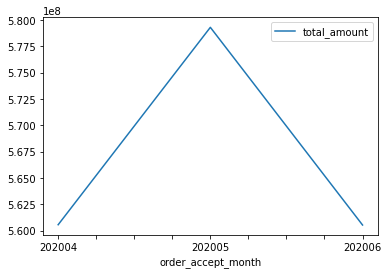

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
month_data.sum().plot()

<AxesSubplot:xlabel='order_accept_month'>

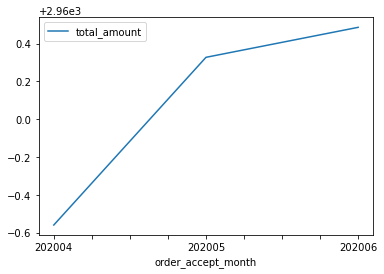

In [18]:
month_data.mean().plot()

### ノック１５：売上からヒストグラムを作成してみよう

### ノック１６：都道府県別の売上を集計して可視化しよう

### ノック１７：クラスタリングに向けてデータを加工しよう

### ノック１８：クラスタリングで店舗をグループ化してみよう

### ノック１９：グループの傾向を分析してみよう

### ノック２０：クラスタリングの結果をt-SNEで可視化しよう